In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating some data

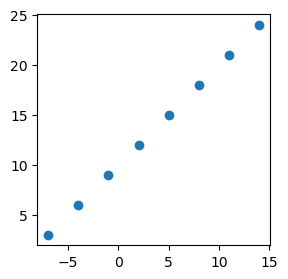

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# sns.scatterplot(x = X, y = y)
plt.figure(figsize = (3, 3), dpi = 100)
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
# Demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

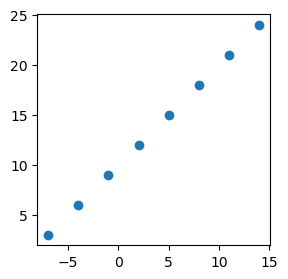

In [14]:
plt.figure(figsize = (3, 3), dpi = 100)
plt.scatter(X, y)

In [15]:
X = tf.expand_dims(X, axis=-1)

In [16]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We want to take 1 number as input, and 1 as output
])

# Another way to do the same thing
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape = (16,)))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent (it could be optimizer = [sgd])
              metrics = ['mae']) 

# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 9.2190 - mae: 9.2190
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.0865 - mae: 9.0865
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9540 - mae: 8.9540
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.8215 - mae: 8.8215
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6890 - mae: 8.6890


In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using uor model
# model.predict(np.array([[17.0]]))
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[23.818245]], dtype=float32)

## Improving model

1. **Creating a model** - add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - fit a model for more epochs or on more data

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 10.6391 - mae: 10.6391
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5066 - mae: 10.5066
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.3741 - mae: 10.3741
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.2416 - mae: 10.2416
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.1091 - mae: 10.1091
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9766 - mae: 9.9766
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.8441 - mae: 9.8441
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.7116 - mae: 9.7116
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.5791 - mae: 9.5791
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.4466 - mae: 9.4466
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.3141 - mae: 9.3141
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.1816 - mae: 9.1816
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[30.180742]], dtype=float32)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - loss: 11.9877 - mae: 11.9877
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.3569 - mae: 11.3569
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.7081 - mae: 10.7081
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.0426 - mae: 10.0426
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3509 - mae: 9.3509
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.6321 - mae: 8.6321
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8780 - mae: 7.8780
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.0701 - mae: 7.0701
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.2071 - mae: 6.2071
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.2831 - mae: 5.2831
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.4145 - mae: 4.4145
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.2719 - mae: 4.2719
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [22]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[31.175322]], dtype=float32)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 12.9461 - mae: 12.9461
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.4576 - mae: 12.4576
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.9650 - mae: 11.9650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.4657 - mae: 11.4657
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.9570 - mae: 10.9570
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.4363 - mae: 10.4363
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9011 - mae: 9.9011
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.3485 - mae: 9.3485
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.7757 - mae: 8.7757
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.1798 - mae: 8.1798
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.5577 - mae: 7.5577
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.2340 - mae: 7.2340
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [24]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[30.671011]], dtype=float32)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - loss: 14.5664 - mae: 14.5664
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.4983 - mae: 14.4983
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.4302 - mae: 14.4302
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.3621 - mae: 14.3621
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.2940 - mae: 14.2940
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.2260 - mae: 14.2260
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.1580 - mae: 14.1580
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.0900 - mae: 14.0900
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.0220 - mae: 14.0220
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.9540 - mae: 13.9540
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.8861 - mae: 13.8861
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.8181 - mae: 13.8181
Epoch 13/100
1/1 ━━━━━━━

In [27]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[27.019606]], dtype=float32)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.7952 - mae: 14.7952
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.0692 - mae: 14.0692
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.3470 - mae: 13.3470
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.6266 - mae: 12.6266
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.9064 - mae: 11.9064
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1845 - mae: 11.1845
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4587 - mae: 10.4587
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.7267 - mae: 9.7267
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.9863 - mae: 8.9863
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.2350 - mae: 8.2350
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4701 - mae: 7.4701
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.6887 - mae: 6.6887
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [29]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[26.802708]], dtype=float32)

In [31]:
model.predict(tf.constant([[25.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[34.690063]], dtype=float32)

In [4]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [5]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

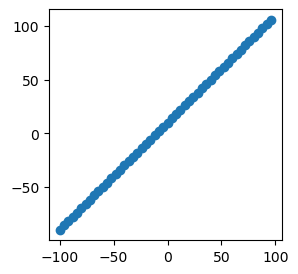

In [6]:
plt.figure(figsize = (3, 3))
plt.scatter(X, y)

In [7]:
X_train = X[:40] # first 40 are training samples (80% of the data) 
y_train = X[:40]

X_test = X[40:] # last 10
y_test = X[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

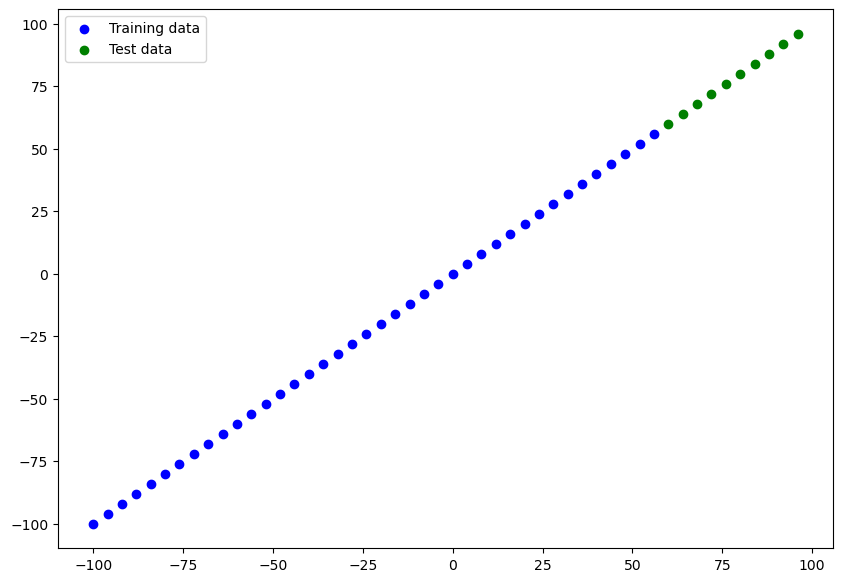

In [6]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, y_test, c = 'g', label = 'Test data')
plt.legend();

In [8]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)
y_train = tf.expand_dims(y_train, axis=-1)
y_test = tf.expand_dims(y_test, axis=-1)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 64.6464 - mae: 64.6464 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.1133 - mae: 28.1133
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1519 - mae: 7.1519
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5599 - mae: 7.5599
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1830 - mae: 7.1830
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2396 - mae: 11.2396
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2331 - mae: 15.2331
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.3698 - mae: 19.3698
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2959 - mae: 12.2959
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5116 - mae: 9.5116
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.3799 - mae: 10.3799
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.9406 - mae: 7.9406
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]) # We are passing 1 number to get 1 number
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

C:\Users\jovan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - parameters (patterns) the model can update as it trains
* Non-trainable params - parameters aren't updated during training (this is when you bring already learn parameters or patterns from other models
during **transfer learning**)

In [9]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
import tensorflow as tf

tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compile the model
model.compile(
    loss='mae',  # Use the string name for the loss function
    optimizer=tf.keras.optimizers.Adam(),  # Instantiate the optimizer
    metrics=['mae']  # Metrics as strings or instantiated objects
)

C:\Users\jovan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


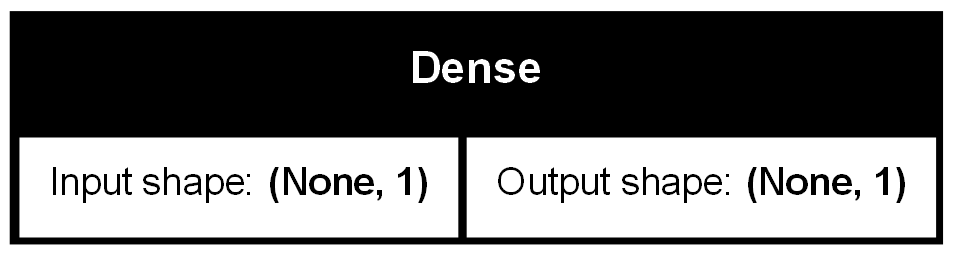

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [12]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[60.360153],
       [64.384186],
       [68.40822 ],
       [72.43225 ],
       [76.456276],
       [80.48031 ],
       [84.50434 ],
       [88.52837 ],
       [92.55241 ],
       [96.57644 ]], dtype=float32)

In [13]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
    plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
    plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
    plt.legend();

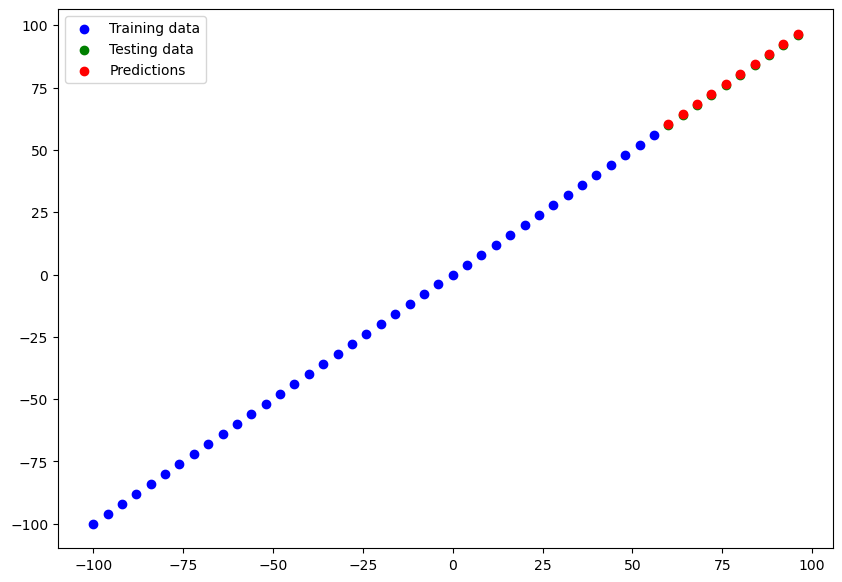

In [14]:
plot_predictions()

In [26]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84],
       [88],
       [92],
       [96]])>

In [15]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.4683 - mae: 0.4683


[0.46829527616500854, 0.46829527616500854]

In [17]:
mae = tf.metrics.mae(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.3601532 , 0.3841858 , 0.40821838, 0.43225098, 0.45627594,
       0.48030853, 0.5043411 , 0.5283737 , 0.5524063 , 0.5764389 ],
      dtype=float32)>

In [18]:
y_test.shape

TensorShape([10, 1])

In [19]:
tf.constant(y_pred).shape

TensorShape([10, 1])

In [20]:
mse = tf.metrics.mse(y_test, y_pred)
overall_mse = tf.reduce_mean(mse)
overall_mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.22406494617462158>

In [21]:
mse = tf.metrics.mae(y_test, y_pred)
overall_mae = tf.reduce_mean(mae)
overall_mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.46829527616500854>

1. `model_1` -  1 layer, 100 epochs
2. `model_2` - 2 layers, 100 epochs
3. `model_3` - 2 layers, 500 epochs

In [22]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

In [23]:
y_preds_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [27]:
y_preds_1

array([[58.412365],
       [62.306503],
       [66.20064 ],
       [70.09478 ],
       [73.988914],
       [77.88305 ],
       [81.77719 ],
       [85.671326],
       [89.56546 ],
       [93.4596  ]], dtype=float32)

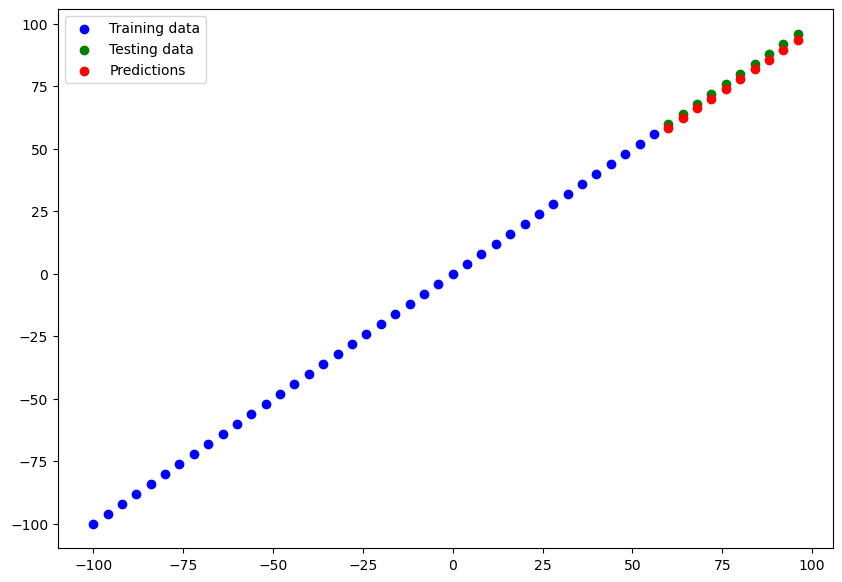

In [24]:
plot_predictions(predictions = y_preds_1)

In [34]:
mae_1 = tf.reduce_mean(tf.metrics.mae(y_test, y_preds_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=2.0640170574188232>

In [30]:
mse_1 = tf.reduce_mean(tf.metrics.mse(y_test, y_preds_1))

In [32]:
y_preds_1_tensor = tf.constant(y_preds_1)
y_preds_1_tensor = tf.reshape(y_preds_1_tensor, [-1])
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, y_preds_1_tensor)
mae_metric.result().numpy()

2.064017

In [35]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [36]:
y_preds_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


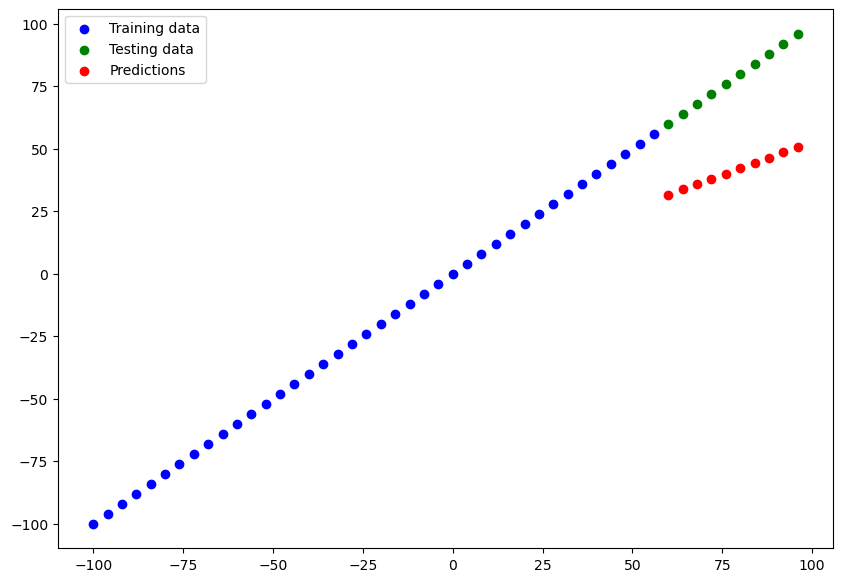

In [37]:
plot_predictions(predictions = y_preds_2)

In [38]:
mae_2 = tf.reduce_mean(tf.metrics.mae(y_test, y_preds_2))

In [39]:
mse_2 = tf.reduce_mean(tf.metrics.mse(y_test, y_preds_2))

In [40]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 37.3999 - mae: 37.3999 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.0134 - mae: 29.0134
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.3919 - mae: 25.3919
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 24.3218 - mae: 24.3218
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.0540 - mae: 25.0540
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 35.4887 - mae: 35.4887
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.3383 - mae: 7.3383
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.2998 - mae: 15.2998
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.8281 - mae: 18.8281
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.9329 - mae: 22.9329
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.1458 - mae: 28.1458
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7970 - mae: 5.7970
Epoch 13/500
2/2 ━━━━━━━━━━━

In [41]:
y_preds_3 = model_3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


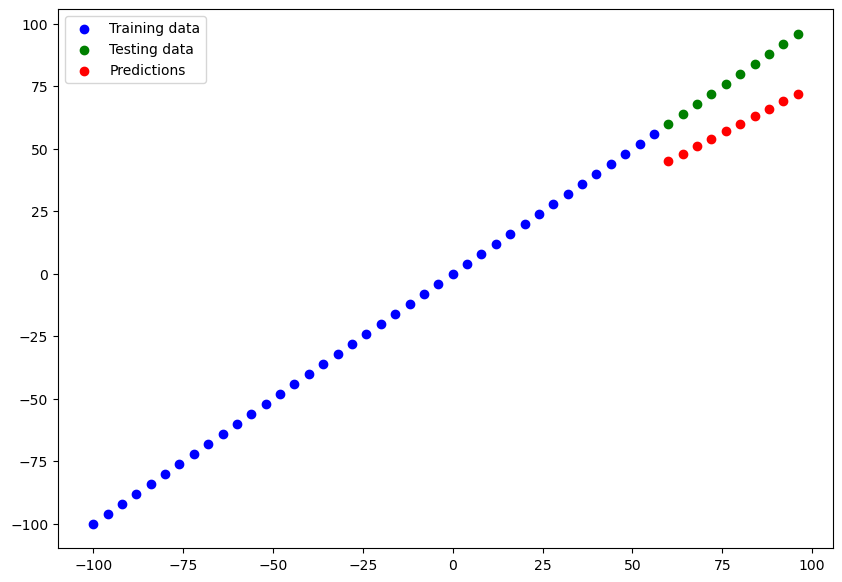

In [42]:
plot_predictions(predictions = y_preds_3)

In [43]:
mae_3 = tf.reduce_mean(tf.metrics.mae(y_test, y_preds_3))

In [44]:
mse_3 = tf.reduce_mean(tf.metrics.mse(y_test, y_preds_3))

### Comparing the results of the models

In [45]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,2.064017,4.352624
1,model_2,36.848690,1387.214966
2,model_3,19.522665,389.332336


In [46]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Saving model

1. The SavedModel format
2. The HDF5 format

In [47]:
tf.saved_model.save(model, './SavedModel')

INFO:tensorflow:Assets written to: ./SavedModel\assets


INFO:tensorflow:Assets written to: ./SavedModel\assets


In [48]:
model.save('regression_model.keras')

In [49]:
model.save('regression_model.h5')

In [2]:
loaded_model = tf.keras.models.load_model('C:\\Users\\jovan\\Desktop\\TensorflowCourse\\Tensorflow-Course\\regression_model.h5')

In [3]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [54]:
model_1_preds = model.predict(X_test)
loaded_preds = loaded_model.predict(X_test)
model_1_preds == loaded_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [11]:
# X_train, y_train

In [49]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')

In [14]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
insurance_one_hot = pd.get_dummies(insurance)

In [19]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [43]:
X = insurance_one_hot.drop('charges', axis = 1)

In [50]:
X = insurance.drop('charges', axis = 1)

In [44]:
y = insurance_one_hot['charges']

In [51]:
y = insurance['charges']

In [45]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10368.1865 - mae: 10368.1865
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7630.4282 - mae: 7630.4282
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8008.7603 - mae: 8008.7603
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7725.3027 - mae: 7725.3027
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7419.3975 - mae: 7419.3975
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7224.2686 - mae: 7224.2686 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7645.5781 - mae: 7645.5781
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7657.9976 - mae: 7657.9976
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7504.9326 - mae: 7504.9326
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7564.9556 - mae: 7564.9556
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7795.7578 - mae: 7795.7578
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [27]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6195.4629 - mae: 6195.4629  


[6048.84716796875, 6048.84716796875]

In [31]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 13252.7988 - mae: 13252.7988
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13073.8584 - mae: 13073.8584
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12706.4951 - mae: 12706.4951
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11996.1260 - mae: 11996.1260
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10831.0469 - mae: 10831.0469
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9375.5166 - mae: 9375.5166
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8073.7822 - mae: 8073.7822
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7472.7720 - mae: 7472.7720
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7384.1924 - mae: 7384.1924
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7359.8130 - mae: 7359.8130
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7338.5737 - mae: 7338.5737
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [32]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4923.6230 - mae: 4923.6230  


[4782.42431640625, 4782.42431640625]

In [35]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13269.4180 - mae: 13269.4180
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13107.5420 - mae: 13107.5420
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12776.9521 - mae: 12776.9521
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12113.2559 - mae: 12113.2559
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10972.2568 - mae: 10972.2568
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9490.5908 - mae: 9490.5908
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8124.5991 - mae: 8124.5991
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7462.6079 - mae: 7462.6079
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7368.2578 - mae: 7368.2578
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7343.3125 - mae: 7343.3125
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7320.9824 - mae: 7320.9824
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [36]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3452.2253 - mae: 3452.2253  


[3387.22998046875, 3387.22998046875]

Text(0.5, 0, 'epochs')

<Figure size 400x200 with 0 Axes>

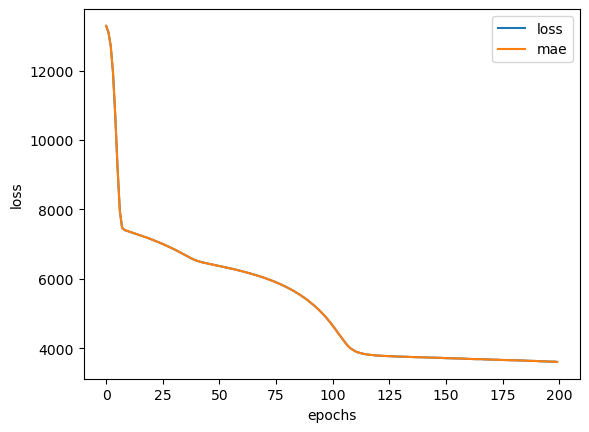

In [38]:
plt.figure(figsize = (4, 2))
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

At around 110, it stops improving, so EarlyStopping Callback will stop further fitting

Preprocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

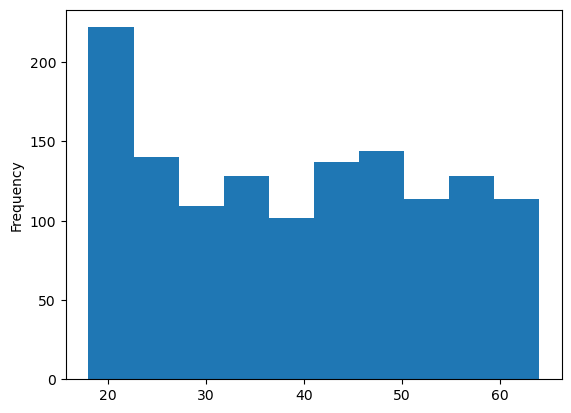

In [39]:
X['age'].plot(kind = 'hist')

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [54]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [53]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [55]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [56]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13297.4814 - mae: 13297.4814
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13289.7100 - mae: 13289.7100
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13271.0215 - mae: 13271.0215
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13230.2383 - mae: 13230.2383
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13154.9883 - mae: 13154.9883
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13033.6084 - mae: 13033.6084
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12855.8408 - mae: 12855.8408
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12611.8887 - mae: 12611.8887
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12292.1680 - mae: 12292.1680
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11890.6055 - mae: 11890.6055
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11416.0410 - mae: 11416.0410
Epoch 12/100
34/34 ━━━━━━━━━━━

In [57]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3512.1841 - mae: 3512.1841  


[3426.788330078125, 3426.788330078125]